# Inferência Estatística (GCC1625) - Trabalho 1
- Nome completo: ANA CAROLINA SÁ COELHO DA SILVA
- Link para o vídeo https://www.youtube.com/watch?v=aSm4XkLBf7Q

# (1) Páginas de livros didáticos
Considere uma população de livros didáticos com aproximadamente o
mesmo tamanho físico. Nessa população, considere que a característica (isto
é, a variável) de interesse é a quantidade de páginas contida em cada livro.
Sendo assim, a população subjacente corresponde a um conjunto de valores
numéricos inteiros positivos (correspondentes à quantidade de páginas de
cada livro).
Nesta parte do trabalho, você irá abordar a situação descrita acima como
um problema de Probabilidade, e não como um problema de Estatística.
Em um problema de Probabilidade, normalmente supõe-se que é conhecida
a distribuição da população (o que não acontece em um problema de Estatística). Assim, considere que a variável aleatória correspondente é a quan
tidade de páginas em um livro da população, e que essa variável segue uma
distribuição uniforme discreta nos inteiros de 150 até 300. Isso significa
que um livro pode ter no mínimo 150 e no máximo 300 páginas, com igual
probabilidade para qualquer quantidade de páginas nesse intervalo.

#### (i) Esboce um gráfico (histograma) da distribuição da população com relação à característica quantidade de páginas. Dica: observe que esta população é modelada por uma distribuição discreta uniforme. Veja detalhes nesta entrada da Wikipédia.

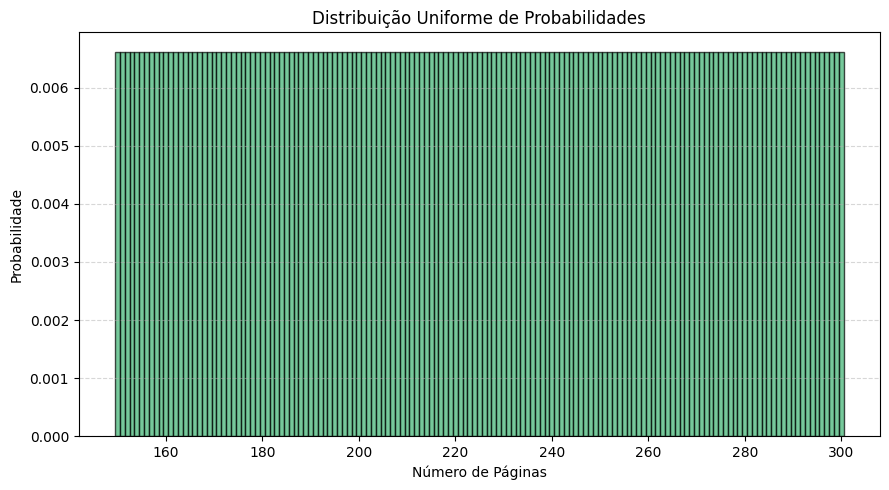

In [16]:
# Código
import numpy as np
import matplotlib.pyplot as plt

# Criando intervalo dos valores possíveis de 150 a 300 (inclusive)
valores = np.arange(150, 301)
probabilidades = np.full_like(valores, 1/len(valores), dtype=float) #cria um array do mesmo tamanho que valores
#cada elemento do array tem o valor 1/len(valores)

# Criando o gráfico
plt.figure(figsize=(9, 5))
plt.bar(valores, probabilidades, width=1, edgecolor='black', color='mediumseagreen', alpha=0.7)
plt.title('Distribuição Uniforme de Probabilidades')
plt.xlabel('Número de Páginas')
plt.ylabel('Probabilidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Explicação: Como a distribuição é discreta uniforme, todas as barras do histograma possuem a mesma altura de aproximadamente 0.0066, sendo 1/151 (151 valores entre 150 e 300). O eixo X representa a quantidade de páginas e o eixo Y representa a probabilidade para cada valor (nesse caso, igual para todos).

O intervalo de valores é criado com np.arange e as probabilidades calculadas com np.full_like.

#### (ii)  Encontre a média (µ), a variância (σ2) e o desvio padrão (σ) da distribuição da população.
 Dica: use as fórmulas da distribuição uniforme discreta disponíveis no link acima.

In [11]:
# Código
import numpy as np
a = 150
b = 300
# Média
media_pop = (a+b) / 2
print(f"Média populacional: {media_pop}")
# Variância
variancia_pop = (((b - a + 1) ** 2) - 1) / 12
print(f"Variância populacional: {variancia_pop}")
# Desvio padrão
desvio_padrao_pop = np.sqrt(variancia_pop)
print(f"Desvio padrão populacional: {desvio_padrao_pop}")


Média populacional: 225.0
Variância populacional: 1900.0
Desvio padrão populacional: 43.58898943540674


Explicação: O código acima calcula a média, variância e desvio padrão de forma manual, utilizando as fórmulas indicadas pelo enunciado:

Média: 

$\mu =\frac{a+b}{2}$

Variância: 

$\sigma^{2} = \frac{(b-a+1)^{2}-1}{12}$

Desvio Padrão calculado com np.sqrt(), passando a variância como parâmetro:

$\sigma = \sqrt{\sigma^{2}}$


#### (iii) Considere que o plano amostral utilizado é uma amostragem aleatória simples com reposição (simple random sample with replacement). Considere tomar amostras de tamanho 2 dessa população e calcular a média de cada amostra. Para cada amostra, você terá uma estatística pontual (a média amostral x). Ao gerar todas as possíveis amostras aleatórias de tamanho 2, a distribuição de todas essas médias constitui a distribuição amostral da média (sampling distribution of the sample mean) para n = 2. 
- Primeiro, implemente uma função que gere todas as possíveis
 amostras de tamanho 2 com reposição, e compute a média de
 cada uma. Por exemplo, para as amostras (200, 200) e (300, 250),
 as médias seriam 200 e 275, respectivamente. Note que diferentes
 amostras podem produzir a mesma média (como, por exemplo,
 (250, 300), (275, 275), (280, 270), etc.).
- Em seguida, usando os valores das médias obtidas, esboce um
 histograma da distribuição amostral da média.

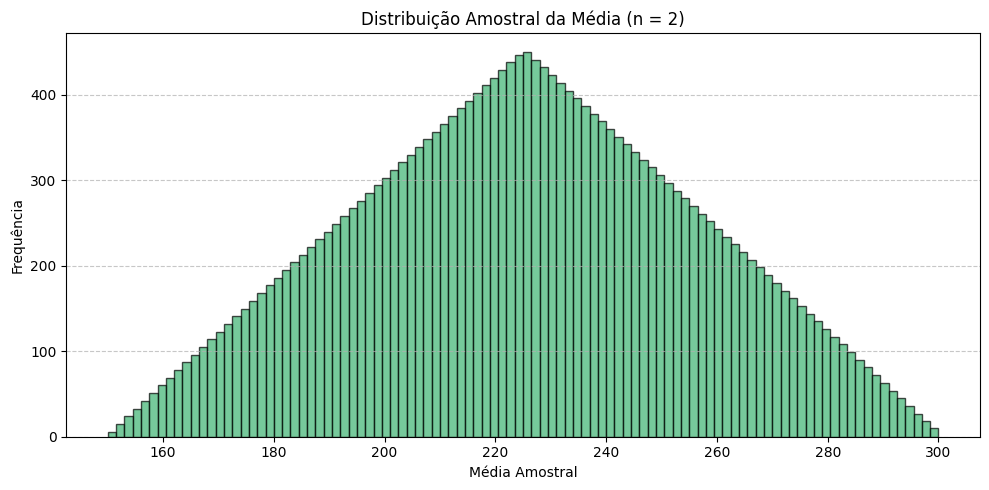

In [17]:
# Código
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from collections import Counter

# Criando a população
populacao = np.arange(150, 301)

# Função para gerar amostras com reposição e calcular suas respectivas médias
def gera_medias_amostrais(populacao, n=2):
    # Repetição para gerar amostras com reposição
    amostras = it.product(populacao, repeat=n) #gera combinaçoes com itertools
    # Calculando as médias das amostras
    medias = [np.mean(amostra) for amostra in amostras] #para cada amostra gerada, calcula a média. junta todas as medias na lista
    return medias

# Gerando as médias amostrais para n=2
medias_amostrais = gera_medias_amostrais(populacao, n=2)

# Histograma
plt.figure(figsize=(10, 5))
plt.hist(medias_amostrais, bins=100, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.title('Distribuição Amostral da Média (n = 2)')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Explicação: Como a distribuição é aleatória simples com reposição, o histograma tem um formato de pirâmide, tendo a maior frequência no centro, em torno da média populacional dada por μ= (150+300)/2 = 225. Com isso, as médias mais comuns aparecem quando os dois valores da amostra estão mais próximos. Quando os valores são discrepantes, há menos frequência.

#### (iv) Calcule a média (µx), a variância (σ2x) e o desvio padrão (σx) da distribuição amostral obtida no item anterior.
 Dica: use as funções mean e var da sua linguagem de programação preferida (como Python ou R).

In [14]:
# Código
media_amostral = np.mean(medias_amostrais)
variancia_amostral = np.var(medias_amostrais)
desvio_padrao_amostral = np.std(medias_amostrais)

print(f"Média amostral = {media_amostral}")
print(f"Variância amostral = {variancia_amostral}")
print(f"Desvio padrão amostral = {desvio_padrao_amostral}")



Média amostral = 225.0
Variância amostral = 950.0
Desvio padrão amostral = 30.822070014844883


Explicação: Para calcular a média amostral, foi utilizada a função np.mean() do NumPy, que calcula a média de um array. Para a variância amostral, foi utilizada a função np.var(), e para o desvio padrão, a função np.std().

#### (v)  O Teorema Central do Limite fornece expressões teóricas para os valores esperados da média e do desvio padrão da distribuição amostral da média x. Use essa teoria e os valores do item (ii) para calcular esses parâmetros no caso de n = 2, e compare com os resultados obtidos no item (iv)

In [18]:
# Código para avaliar as afirmações do Teorema Central do Limite

# Parâmetros teóricos da distribuição amostral da média para n = 2
media_teorica = media_pop
var_teorica = variancia_pop / 2
dp_teorico = desvio_padrao_pop / (2**0.5)

print(f"Média teórica: {media_teorica:.2f}")
print(f"Variância teórica: {var_teorica:.2f}")
print(f"Desvio padrão teórico: {dp_teorico:.2f}")

print(f"Média teórica é igual a média amostral: {media_teorica == media_amostral}")
print(f"Variância teórica é igual a variância amostral: {var_teorica == variancia_amostral}")
print(f"Desvio padrão teórico é igual a desvio padrão amostral: {dp_teorico == desvio_padrao_amostral}")

Média teórica: 225.00
Variância teórica: 950.00
Desvio padrão teórico: 30.82
Média teórica é igual a média amostral: True
Variância teórica é igual a variância amostral: True
Desvio padrão teórico é igual a desvio padrão amostral: True


Explicação: Analisando os valores acima, é possivel verificar a equivalencia entre os valores teóricos e os amostrais, por meio do TLC, que afirma que a média se aproxima da média populacional, que a variância da média amostral se aproxima da variancia da população dividida pelo tamanho das amostras (nesse caso, n=2) e que o desvio padrão se aproxima ao desvio populacional dividido pela raiz quadrada de n:

Para a média: 
$$
\mu_{\overline{x}}= \operatorname{E}[\overline{x}] \approx \mu
$$
Para a Variância:
$$
\sigma_{\overline{x}}^2 = Var[\overline{x}] \approx \frac{\sigma^2}{n}
$$
Para o Desv. Padrão:
$$
\sigma_{\overline{x}} = \frac{\sigma}{\sqrt{n}}
$$

#### (vi ) Agora, suponha que desejamos estudar a distribuição amostral da média para amostras de tamanho n = 9.

(a) Quantas amostras diferentes de tamanho 9 podem ser geradas a
 partir da população? Essa tarefa é viável de ser feita manualmente
 ou com auxílio computacional?

Resposta: A população contém 151 valores distintos (de 150 a 300).

Como a amostragem é **com reposição**, o número total de amostras possíveis de tamanho 9 é dado por:

$$
151^9 \approx 2.44 \times 10^{19}
$$
 Esse número é extremamente grande. Portanto, não é viável gerar todas as amostras manualmente ou mesmo computacionalmente. A alternativa é usar simulação para gerar amostras representativas.


(b) Gere uma distribuição amostral empírica da média(uma aproximação da distribuição teórica) para n = 9.
Dica: gere uma grande quantidade de amostras aleatórias e construa um histograma com as médias amostrais obtidas

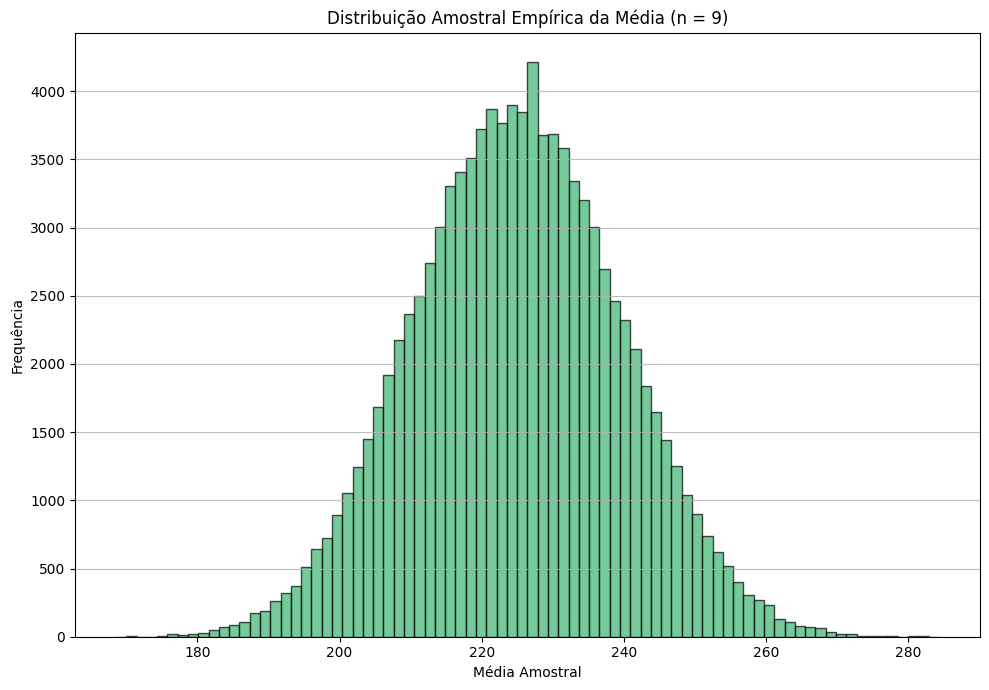

In [23]:
# Código letra b)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# População
populacao = np.arange(150, 301)

n_amostras = 100000  # número de amostras simuladas
tamanho_amostra = 9

# Gerar amostras aleatórias com reposição
# cada linha de amostras é uma amostra de 9 números tirados da populaçao com reposiçao
amostras = np.random.choice(populacao, size=(n_amostras, tamanho_amostra), replace=True)

# Calcular médias amostrais
medias_amostrais = np.mean(amostras, axis=1)

# Plotar histograma 
plt.figure(figsize=(10, 7))
plt.hist(medias_amostrais, bins=80, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.title('Distribuição Amostral Empírica da Média (n = 9)')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='-', alpha=0.8)
plt.tight_layout()

plt.show()


Explicação: O código acima gera amostras aleatórias (com reposição) por meio da função np.random.choice(). Após obter as amostras, foi calculada a média amostral com a função np.mean() e o histograma foi plotado. 

# (2) Problema dos tanques alemães



Durante um conflito fictício, o serviço de inteligência de um país deseja estimar a quantidade total de veículos blindados produzidos por um país adversário. Esses veículos são numerados sequencialmente a partir de 1 (por exemplo: 1, 2, 3, ..., *N*), e alguns deles foram capturados no campo de batalha.

Suponha que foram capturados aleatoriamente **k = 5** tanques com os seguintes números de série:
{17, 32, 45, 59, 88}

**Objetivo:**  
Estimar o número total *N* de tanques produzidos pelo inimigo, usando métodos estatísticos apropriados.




#### (i) Apresente uma estimativa pontual de N com base na amostra coletada, usando o seguinte estimador clássico:

$$
\hat{N} = M + \frac{M}{k} - 1
$$

onde **M** é o maior número observado na amostra, e **k** é o tamanho da amostra.



In [24]:
# Código	
# Dados da amostra (tanques)
amostra = [17, 32, 45, 59, 88]

# Função para estimar N a partir de uma amostra
def estimador_N(amostra):
    M = max(amostra)
    k = len(amostra)
    return M + (M / (k) - 1) # de acordo com a formula

print(f"Estimativa pontual de N: {estimador_N(amostra)}")


Estimativa pontual de N: 104.6


Explicação: A estimativa foi calculada com uma função que recebe uma amostra, que pode ser reutilizada em outras questões. Assim, é obtido M com max() e k com len(), retornando o valor calculado com base na fórmula.

#### (ii) Implemente (ou descreva) uma simulação computacional que reproduza o processo de amostragem aleatória de k = 5 tanques a partir de uma população com N = 100 tanques numerados sequencialmente.  
Repita esse processo muitas vezes (por exemplo, 10.000 vezes) e registre as estimativas $ \hat{N} $ em cada simulação.


In [25]:
import numpy as np

N_real = 100  # número real de tanques
k = 5  # tamanho da amostra
simulacoes = 10000  # número de simulações

# Função para simular várias estimativas
def simular_estimativas(N_real, k, num_simulacoes):
    estimativas = []
    for _ in range(num_simulacoes):
        amostra = np.random.choice(np.arange(1, N_real + 1), size=k, replace=False) #cria um array de numero de 1 até 101. sorteia k numeros diferentes desse vetor.
        N_hat = estimador_N(amostra) # utilizando a funçao para estimar N
        estimativas.append(N_hat)
    return np.array(estimativas)

# Simulação
estimativas_simuladas = simular_estimativas(N_real, k, simulacoes)
print(f"Estimativas: {estimativas_simuladas}")


Estimativas: [ 97.4 116.6 117.8 ...  93.8 111.8  97.4]


Explicação: As estimativas foram registradas por meio do código acima com 10000 simulações, utilizando uma função criada que recebe o N real, k (tamanho da amostra) e número de simulações. Ela gera uma amostra para cada simulação com np.random.choice e, para cada amostra, é estimado o $\hat{N}$ por meio da função criada em código anterior, inserindo-o em uma lista de estimativas.

#### (iii) Construa um histograma com as estimativas obtidas na simulação do item anterior e analise o comportamento do estimador $\hat{N}$.  Ele é viesado? Subestima ou superestima frequentemente o verdadeiro valor de N?


Média das estimativas: 99.84608
Variância das estimativas: 275.03514014761475


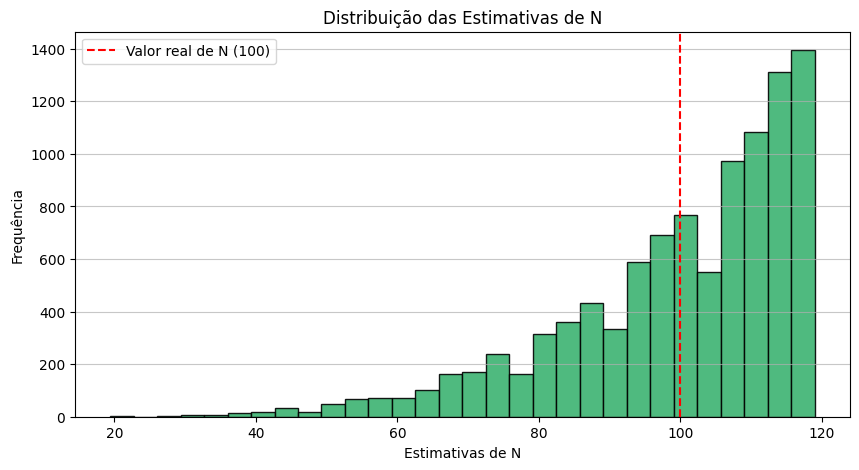

In [26]:
# Codigo
import matplotlib.pyplot as plt

media_estimativas = np.mean(estimativas_simuladas)
print(f"Média das estimativas: {media_estimativas}")
variancia_estimativas = np.var(estimativas_simuladas, ddof=1)  # ddof=1 para amostral
print(f"Variância das estimativas: {variancia_estimativas}")
# Histograma das estimativas criadas anteriormente
plt.figure(figsize=(10, 5))
plt.hist(estimativas_simuladas, bins=30, color='mediumseagreen', edgecolor='black', alpha=0.9)
plt.axvline(x=N_real, color='red', linestyle='--', label='Valor real de N (100)')
plt.title('Distribuição das Estimativas de N')
plt.xlabel('Estimativas de N')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()


Explicação: O histograma mostra como as estimativas $ \hat{N} $ variam de uma simulação para outra.  
Para avaliar o viés, devemos observar a média obtida para as simulações. Temos que a média real é 100 e a média simulada é um valor bem próximo ao real. Como a média das simulaçoes se aproxima bastante da média real, esse estimador não é viesado. Caso a média fosse muito abaixo ou muito acima, seria possível afirmar que ele possui viés.

Além disso, mesmo com uma média simulada muito próxima da real, a variância simulada é bem alta, o que indica imprecisão do estimador.

Com isso, o estimador é **não-viesado**, mas **impreciso**.




#### (iv) Calcule a média, a variância e o desvio padrão das estimativas geradas pela simulação. Compare com o valor real de N = 100 e discuta os resultados

In [27]:
# Código
import numpy as np
import matplotlib.pyplot as plt

media_estimativas = np.mean(estimativas_simuladas)
variancia_estimativas = np.var(estimativas_simuladas, ddof=1)  # ddof=1 para amostral
desvio_padrao_estimativas = np.std(estimativas_simuladas, ddof=1)  # ddof=1 para amostral

print(f"Média das estimativas: {media_estimativas}")
print(f"Variância das estimativas: {variancia_estimativas}")
print(f"Desvio padrão das estimativas: {desvio_padrao_estimativas}")

Média das estimativas: 99.84608
Variância das estimativas: 275.03514014761475
Desvio padrão das estimativas: 16.58418343324792


Análise: A média obtida se aproxima bastante do valor de N real = 100, indicando que o estimador **não** é viesado.
Além disso, a variância e o desvio padrão indicam o grau de dispersão das estimativas ao redor da média. Um desvio padrão de aproximadamente 16.59 mostra que, embora o estimador seja centrado no valor correto, ele pode variar consideravelmente de uma simulação para outra.
O estimador, devido a alta variância, tende a ser **impreciso**.


#### (v) Agora, repita a simulação para diferentes tamanhos de amostra (k =2, 5, 10, 20). Como  o tamanho da amostra influencia a qualidade da estimativa de N?

In [28]:
# Tamanhos de amostra a testar
ks = [2, 5, 10, 20]
resultados = {}

# Simulação com exibição durante a execução
for k in ks:
    print(f"\nSimulando para k = {k}")
    estims = simular_estimativas(N_real=100, k=k, num_simulacoes=10000) #usando função criada anteriormente
    media = np.mean(estims)
    variancia = np.var(estims, ddof=1)  # ddof=1 para amostral
    desvio = np.sqrt(variancia)
    resultados[k] = (media, variancia, desvio)
    
    print(f"  Média das estimativas: {media}")
    print(f"  Variância das estimativas: {variancia}")
    print(f"  Desvio padrão das estimativas: {desvio}")



Simulando para k = 2
  Média das estimativas: 99.74855
  Variância das estimativas: 1261.714319329433
  Desvio padrão das estimativas: 35.5206182284238

Simulando para k = 5
  Média das estimativas: 99.99404
  Variância das estimativas: 281.71975245364536
  Desvio padrão das estimativas: 16.784509300353267

Simulando para k = 10
  Média das estimativas: 100.05491
  Variância das estimativas: 75.67237912981298
  Desvio padrão das estimativas: 8.69898724736466

Simulando para k = 20
  Média das estimativas: 99.954245
  Variância das estimativas: 18.85168089806481
  Desvio padrão das estimativas: 4.341852242772065


Análise: Quanto maior o tamanho da amostra, mais precisa é a estimativa de $\hat{N}$, pois é possível observar que a média se aproxima mais do N real = 100, além da redução da variância e desvio padrão, o que indica menor variabilidade na estimativa e mais precisão. 

Com isso, quanto maior a amostra, maior é a qualidade do estimador, tornando-o mais preciso.

#### (vi) Proponha um intervalo de confiança para N com base nas simulações. Discuta se o verdadeiro valor (N = 100) costuma estar dentro do intervalo estimado.

In [29]:
# Código
# usando os tamanhos de amostra 2, 5, 10 e 20

ks = [2, 5, 10, 20]
N_real = 100
simulacoes = 10000

for k in ks:
    estimativas = simular_estimativas(N_real, k, simulacoes)
    
    #calculando o menor valor das estimativas -> inicio do intervalo de confiança
    limite_inferior = np.percentile(estimativas, 2.5)
    
    #calculando o maior valor das estimativas -> fim do intervalo de confiança
    limite_superior = np.percentile(estimativas, 97.5)
    
    #verifica se o n_real está dentro do intervalo
    contem_N = "Sim" if limite_inferior <= N_real <= limite_superior else "Não"

    print(f"k = {k}")
    print(f"  Intervalo de confiança (95%): [{limite_inferior:.2f}, {limite_superior:.2f}]")
    print(f"  O valor real N = 100 está dentro do intervalo? {contem_N}\n")


k = 2
  Intervalo de confiança (95%): [26.00, 147.50]
  O valor real N = 100 está dentro do intervalo? Sim

k = 5
  Intervalo de confiança (95%): [57.80, 119.00]
  O valor real N = 100 está dentro do intervalo? Sim

k = 10
  Intervalo de confiança (95%): [77.10, 109.00]
  O valor real N = 100 está dentro do intervalo? Sim

k = 20
  Intervalo de confiança (95%): [88.25, 104.00]
  O valor real N = 100 está dentro do intervalo? Sim



Análise: Dentro desse intervalo, para todos os tamanhos de amostra, o verdadeiro valor N=100 costuma estar contido. Executando esse bloco de código muitas vezes, teremos Sim na maioria das respostas verificando se o valor 100 está dentro do intervalo. Obtemos o intervalo de confiança de 95% separando com limite inferior até 2.5 e com limite superior até 97.5 (percentis). Vale ressaltar que, quanto maior a amostra, menor é a amplitude do intervalo, tendo maior precisão.

#### (vii) Contextualização histórica: Pesquise brevemente como esse problema foi utilizado durante a Segunda Guerra Mundial. Comece sua pesquisa pela entrada correspondente na Wikipedia2. Quais foram as conclusões reais tiradas a partir dos números de série? Comente a importância histórica da inferência estatística nesse contexto.

Resposta: Durante a Segunda Guerra Mundial, era necessário, para os Aliados, a estimativa de quantos tanques eram produzidos pela Alemanha, fazendo uso dos números de série dos tanques capturados para aplicar um método estatístico com o maior número de série observado e o tamanho da amostra obtida. Foi estimado, com essa abordagem, que a Alemanha produzia em torno de 270 tanques de guerra por mês. Após a guerra, foi revelado que o número real de tanques (N real) era de 276, indicando que a estimativa foi mais precisa que outras abordagens convencionais, que previam até 1400 tanques. A partir disso, é evidente que técnicas de inferência, como essa, possuem ótimas aplicações em contextos reais, tendo grande impacto em, até mesmo, estratégias militares e espionagem, como nesse caso. 

# (3) Diferença de médias

Considere que um pesquisador tenha desenvolvido um medicamento que supostamente melhora a memória. Considere duas populações hipotéticas: o desempenho das pessoas em um teste de memória se elas tiverem tomado o medicamento e o desempenho das pessoas se não tiverem.

Suponha que a média ($\mu_1$) e a variância ($\sigma_1^2$) da distribuição das pessoas que tomam o medicamento sejam 50 e 25, respectivamente, e que a média ($\mu_2$) e a variância ($\sigma_2^2$) da distribuição das pessoas que não tomam o medicamento sejam 40 e 24, respectivamente.

Segue-se que o medicamento, em média, melhora o desempenho no teste de memória em 10 pontos. Essa melhora de 10 pontos é para toda a população.

Agora, considere a distribuição amostral da diferença entre as médias. Essa distribuição pode ser entendida pensando no seguinte plano amostral:

1. Produzir uma amostra de $n_1$ escores da população de pessoas que tomam o medicamento e computar a média. Essa média será designada como $M_1$.
2. Em seguida, produzir uma amostra de $n_2$ escores da população de pessoas que não tomam o medicamento e computar a média. Essa média será designada como $M_2$.
3. Calcular a diferença entre $M_1$ e $M_2$. Essa diferença será chamada de $M_d$, onde o $d$ significa “diferença”. Esta é a estatística cuja **distribuição amostral** é de interesse.

A distribuição amostral pode ser aproximada repetindo o plano amostral acima várias vezes e plotando os valores de $M_d$. A distribuição de frequência (histograma) resultante seria uma aproximação da distribuição amostral.

A média ($\mu_{M_d}$) e a variância ($\sigma^2_{M_d}$) da distribuição amostral de $M_d$ são:

$$
\mu_{M_d} = \mu_1 - \mu_2
$$

$$
\sigma^2_{M_d} = \frac{\sigma^2_1}{n_1} + \frac{\sigma^2_2}{n_2}
$$

Para o exemplo atual:

$$
\mu_{M_d} = 50 - 40 = 10
$$
$$
\sigma^2_{M_d} = \frac{25}{n_1} + \frac{24}{n_2}
$$


Se $n_1 = 10$ e $n_2 = 8$, então:

$$
\sigma^2_{M_d} = \frac{25}{10} + \frac{24}{8} = 5.5
$$

Finalmente, o erro padrão de $M_d$ é simplesmente a raiz quadrada da variância da distribuição amostral de $M_d$:

$$
\sigma_{M_d} = \sqrt{\frac{25}{10} + \frac{24}{8}} =  2.35
$$

Agora, com base nas informações fornecidas acima, responda aos itens a seguir.


#### (i) Utilizando o plano amostral descrito acima, produza um histograma que aproxima a distribuição amostral de $M_d$. Dica: repita os passos do plano amostral descrito 10.000 vezes. Em seguida, crie o histograma solicitado com os 10.000 valores produzidos.


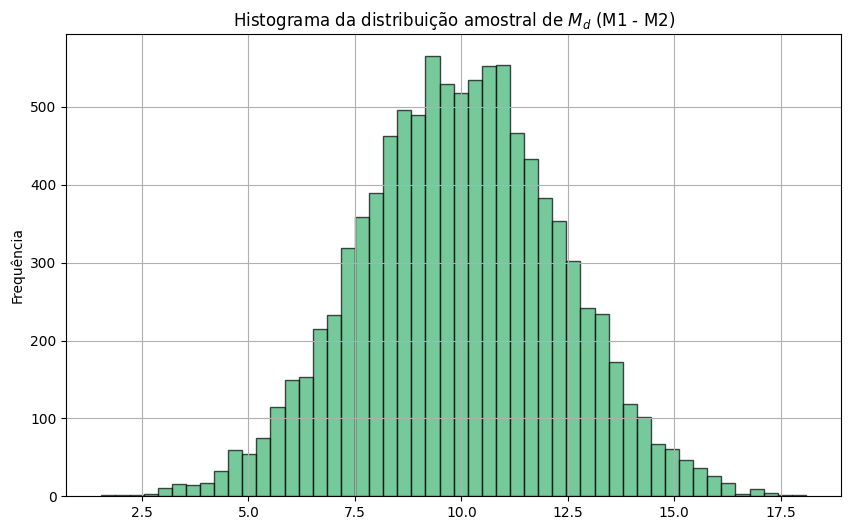

In [30]:
# Código
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros das populações
mu1, sigma1_sq = 50, 25  # Com medicamento
mu2, sigma2_sq = 40, 24  # Sem medicamento
n1, n2 = 10, 8  # Tamanhos das amostras
simulacoes = 10000

# Gerar diferenças amostrais
diferencas = []
for _ in range(simulacoes):
    
    # Amostras aleatórias
    amostra1 = np.random.normal(mu1, np.sqrt(sigma1_sq), n1)
    amostra2 = np.random.normal(mu2, np.sqrt(sigma2_sq), n2)
    # Medias
    M1 = np.mean(amostra1)
    M2 = np.mean(amostra2)
    # Diferença das médias
    Md = M1 - M2
    diferencas.append(Md)

# Plotar histograma
plt.figure(figsize=(10, 6))
plt.hist(diferencas, bins=50, color='mediumseagreen', edgecolor='black', alpha =0.7)
plt.title('Histograma da distribuição amostral de $M_d$ (M1 - M2)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


Explicação: Este código simula a diferença entre as médias de dois grupos (um que tomou o medicamento e outro que não tomou) com base em amostras aleatórias. Repetindo o processo 10.000 vezes, geramos a distribuição amostral da diferença das médias ($M_d = M_1 - M_2$). O histograma resultante mostra como essa diferença se distribui, ajudando a entender o efeito do medicamento no desempenho de memória.

#### (ii) Usando a aproximação da distribuição amostral de Md obtida no item anterior, compute aproximações para a média e o desvio padrão dessa estatística. Os valores que você obteve são próximos aos fornecidos acima? Explique.


In [31]:
# Código
# Calculando média e desvio padrão das estimativas simuladas
media_simulada = np.mean(diferencas) #mu
desvio_simulado = np.std(diferencas)

# Exibindo os resultados
print(f"Média simulada: {media_simulada}")
print(f"Desvio padrão simulado: {desvio_simulado}")


Média simulada: 9.96869020161342
Desvio padrão simulado: 2.34417713300241


Resposta: 

Média da distribuição amostral de Md (µMd): 10

Desvio padrão da distribuição amostral de Md (σMd): 2.35

Com isso, os valores obtidos na simulação são próximos aos valores teóricos, o que indica que a simulação está correta e que a distribuição amostral de Md se aproxima de uma normal com um grande número de amostras, conforme esperado pelo Teorema Central do Limite.


#### (iii) Uma vez conhecidos a média e o erro padrão da distribuição amostral de uma estatística, é possível responder a diversas perguntas. Para o caso da estatística aqui mencionada (diferença entre as médias), responda a seguinte pergunta: *Se um experimento com o medicamento para a memória descrito for realizado, qual é a probabilidade de a média do grupo de 10 sujeitos que receberam o medicamento ser 15 ou mais pontos maior do que a média dos 8 sujeitos que não receberam o medicamento?*


In [32]:
# Código

from scipy.stats import norm

limite = 15  # Limite de diferença entre as médias (15 pontos)

# Cálculo da probabilidade usando média e desvio amostrais (simulados)
probabilidade = 1 - norm.cdf(limite, loc=media_simulada, scale=desvio_simulado)
probPerc = probabilidade * 100

# Exibindo o resultado
print(f"A probabilidade de a média do grupo com o medicamento ser 15 ou mais pontos maior é: {probabilidade:.4f} ou {probPerc}%")



A probabilidade de a média do grupo com o medicamento ser 15 ou mais pontos maior é: 0.0159 ou 1.592448468558516%


Resposta: Para computar a probabilidade de valores até 15 (valor limite), foi utilizada a função norm.cdf, que calcula a prob. acumulada de uma distribuição normal com a média e desvio padrão estabelecidos. Como queremos a probabilidade de obter maior ou igual a 15, é necessário substrair a probabilidade acumulada de 1, obtendo cerca de 1.59% de probabilidade dessa ocorrência.

# (4) Áudio ou texto?

Imagine que você seja um candidato a emprego tentando apresentar suas habilidades a um recrutador em um processo seletivo de uma empresa. Em qual das duas condições abaixo você teria mais chances de conseguir o emprego?

- Você grava um áudio com um breve discurso descrevendo suas habilidades para o recrutador;
- Você escreve um breve discurso para que o recrutador o leia.

A questão de pesquisa acima foi levantada por Schroeder and Epley (2015). Nesse artigo, os autores concluíram que a maneira como uma pessoa fala (ou seja, tom vocal, cadência, etc.) comunica informações sobre seu intelecto melhor do que suas palavras escritas (mesmo que sejam as mesmas palavras usadas no discurso falado).

Para examinar a questão de pesquisa descrita acima, os autores designaram aleatoriamente 39 recrutadores profissionais de empresas da Fortune 500 para uma de duas condições.

- Na *condição de áudio*, os participantes ouvem gravações de áudio do discurso falado de um candidato a emprego.
- Na *condição de transcrição*, os participantes lêem uma transcrição do discurso do candidato a emprego.

Depois de ouvir ou ler o discurso, os participantes classificaram os candidatos a emprego em três dimensões: inteligência, competência e foco. Essas classificações foram então usadas para criar uma única medida do intelecto do candidato, com pontuações mais altas indicando que os recrutadores classificaram os candidatos como superiores em intelecto. Os participantes também avaliaram sua impressão geral do candidato ao emprego (uma combinação de dois itens medindo impressões positivas e negativas). Por fim, os participantes indicaram qual o potencial de recomendar a contratação do candidato (0 - nada provável, 10 - extremamente provável).

O conjunto de dados fornecido para realizar esta parte do trabalho está no arquivo **SchroederEpley2015data.txt**. Nesse conjunto de dados, existem várias colunas. Contudo, há duas colunas de interesse para esta parte do trabalho.

- A coluna **CONDITION** indica a condição à qual cada recrutador foi alocado. O valor 1 indica que o recrutador foi alocado na condição de áudio; O valor 0 indica que o recrutador foi alocado na condição de transcrição.

- A coluna **Intellect_Rating** indica a avaliação que cada recrutador atribuiu ao candidato. Essa avaliação é um valor inteiro entre 0 e 10.

Repare que a coluna **CONDITION** permite dividir a coleção de valores de avaliações em duas amostras distintas, que vamos chamar de $S _{a}$ e de $S _{t}$. As amostras $S _{a}$ e $S _{t}$ correspondem aos valores de avaliação atribuídos por recrutadores nas condições de áudio e de transcrição, respectivamente.
Agora, com base nas informações fornecidas acima, responda aos itens a seguir.


#### (i) Compute a média e o tamanho (quantidade de observações) tanto para $S_a$ quanto $S_t$.

In [33]:
# Código
import pandas as pd


# Carregar os dados
df = pd.read_csv('SchroederEpley2015data.txt')

# Separar as amostras
sa = df[df['CONDITION'] == 1]['Intellect_Rating']
st = df[df['CONDITION'] == 0]['Intellect_Rating']

# Calcular médias e tamanhos
media_sa = sa.mean()
media_st = st.mean()
n_sa = sa.count()
n_st = st.count()

print(f"Média SA: {media_sa}")
print(f"Tamanho SA: {n_sa}")
print(f"Média ST: {media_st}")
print(f"Tamanho ST: {n_st}")



Média SA: 5.634920634920636
Tamanho SA: 21
Média ST: 3.6481481481481493
Tamanho ST: 18


Explicação: O código, por meio da biblioteca pandas, realiza a leitura dos dados e separa as amostras $S_a$ e $S_t$.  $ S_a$ contém valores de Intellect Rating de recrutadores que ouviram o áudio e $S_t$ são os que leram a transcrição. Com isso, calculamos as médias das amostras e seus respectivos tamanhos (quantidade de observações/pessoas presentes). 

#### (ii) Construa um boxplot para apresentar graficamente as duas amostras. Seu gráfico deve ser semelhante ao apresentado na Figura 1. Em Python, você pode usar a biblioteca Seaborn. Em R, você pode usar a biblioteca GGPLOT2. Forneça uma análise das informações fornecidas pelo gráfico.

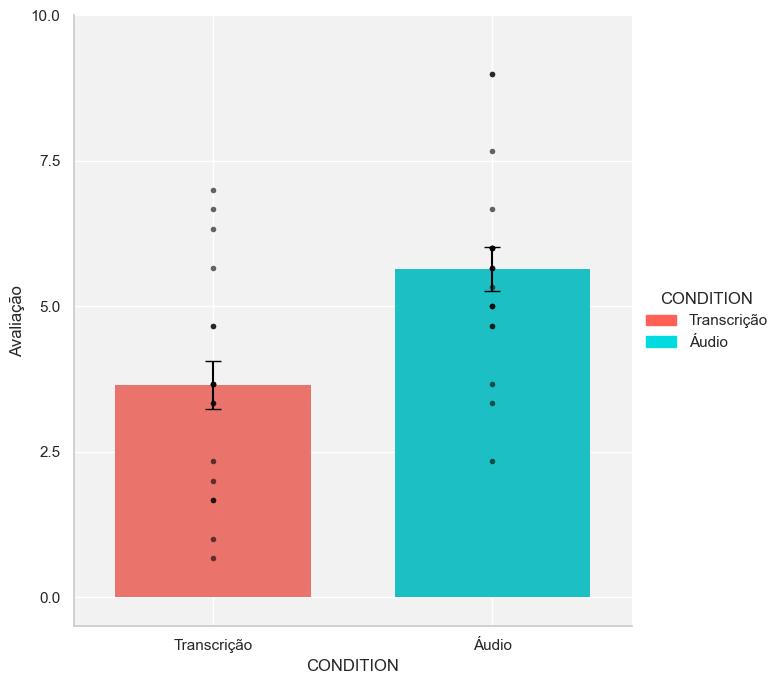

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Estilo
plt.figure(figsize=(8, 7))
sns.set_style("whitegrid", {'axes.facecolor': '#f2f2f2', 'grid.color': 'white'})

# Cores e labels
cores = ['#ff6157', '#00dbe0']
labels = ['Transcrição', 'Áudio']

# Agrupar os dados
grouped = df.groupby("CONDITION")["Intellect_Rating"]
means = grouped.mean()

# Calcular os erros
error_sa = df[df['CONDITION'] == 0]['Intellect_Rating'].std() / n_sa**0.5
error_st = df[df['CONDITION'] == 1]['Intellect_Rating'].std() / n_st**0.5
errors = [error_sa, error_st]

# Plotar as barras com os erros (usando x=i para alinhar com o eixo numérico)
for i, (mean, error) in enumerate(zip(means, errors)):
    sns.barplot(x=[i], y=[mean], edgecolor='none', capsize=6, color=cores[i], width=0.7, alpha=1)
    plt.errorbar(x=i, y=mean, yerr=error, fmt='none', color='black', capsize=6)

# Plotar os pontos sobre as barras
sns.stripplot(
    data=df,
    x='CONDITION',
    y='Intellect_Rating',
    color='black',
    size=4,
    jitter=False,
    alpha=0.6,
    dodge=False
)

# Estilização do gráfico
plt.xticks([0, 1], labels)
plt.yticks(np.arange(0, max(df['Intellect_Rating'].max(), 10) + 2.5, 2.5))
plt.ylim(bottom=-0.5)
plt.xlabel("CONDITION")
plt.ylabel("Avaliação")

# Legenda manual com Patch
handles = [Patch(color=cores[0], label='Transcrição'),
           Patch(color=cores[1], label='Áudio')]

legend = plt.legend(handles=handles, title="CONDITION", loc='center left', bbox_to_anchor=(1, 0.5))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('none')

# Grade e visual
plt.grid(True, axis='both', linestyle='-', linewidth=1, color='white')
sns.despine()
plt.tight_layout()
plt.show()


Explicação: Utilizando o bloco de código da questão anterior para obter os dados (df), o código gera um boxplot que compara visualmente a avaliação de intelecto em duas condições diferentes: áudio e transcrição.  É criado, inicialmente, um gráfico de colunas com o desvio padrão. Com Seaborn e Matplotlib, ele calcula as médias e desvios (erros) de cada grupo baseado na coluna Intellect_Rating, plota o boxplot no formato de barras de erro (linhas pretas na visualização), onde cada ocorrência é exibida com pontos individuais (stripplot). 

Analisando o gráfico, é possível observar que a condição de Áudio foi melhor avaliada, visto que a coluna referente está maior, além de possuir mais ocorrências (pontos) em valores maiores em comparação à Transcrição. 

Explicação: Utilizando o bloco de código da questão anterior para obter os dados (df), o código gera um boxplot que compara visualmente a avaliação de intelecto em duas condições diferentes: áudio e transcrição.  É criado, inicialmente, um gráfico de colunas com o desvio padrão. Com Seaborn e Matplotlib, ele calcula as médias e desvios (erros) de cada grupo baseado na coluna Intellect_Rating, plota o boxplot no formato de barras de erro (linhas pretas na visualização), onde cada ocorrência é exibida com pontos individuais (stripplot). 

Analisando o gráfico, é possível observar que a condição de Áudio foi melhor avaliada, visto que a coluna referente está maior, além de possuir mais ocorrências (pontos) em valores maiores em comparação à Transcrição. 

#### (iii) Aplique um teste de normalidade em ambas as amostras, $S_a$ e $S_t$. Apresente uma análise do resultado obtido

In [66]:
# codigo usando shapiro
from scipy.stats import shapiro

# Aplicar o teste de Shapiro-Wilk nas duas amostras
stat_sa, p_sa = shapiro(sa)
stat_st, p_st = shapiro(st)

print(f"Sa (Áudio) — Estatística: {stat_sa}, p-valor: {p_sa}")
print(f"St (Transcrição) — Estatística: {stat_st}, p-valor: {p_st}")


Sa (Áudio) — Estatística: 0.9350407950235545, p-valor: 0.17365077802186274
St (Transcrição) — Estatística: 0.9512397971631612, p-valor: 0.4447967589528345


Explicação: Para testar a normalidade em ambas as amostras, foi utilizado o teste de Shapiro-Wilk por meio da biblioteca scipy.stats com a função shapiro, que calcula uma estatística W e um p-valor. Com esse teste, quanto mais a estatística calculada W (stat_sa e stat_st) se aproxima de 1, mais os dados tendem a se distribuírem de forma normal. Caso o p-valor seja menor que 0.05, a chance de seguir uma distribuição normal é nula, caso seja maior, a distribuição é considerada normal.

Para esse caso, temos que stat_sa e stat_st são próximas de 1 e possuem p-valor maiores que 0.05 e, portanto, seguem uma distribuição normal.

####  (iv) Construa um intervalo de confiança para a média de avaliações produzidas por duas populações distintas, P1 e P2, descritas abaixo.
- $P_1$: todos os recrutadores que ouvem os áudios
- $P_2$: todos os recrutadores que leem os transcritos
  
Note que a resposta a este item devem ser dois intervalos de confiança.
Nos dois casos, use o nível de confiança de 99%.

In [86]:
# Codigo
import numpy as np
from scipy.stats import norm

confianca = 0.99

# desvios das amostras
desvio_sa = sa.std()
desvio_st = st.std()

# calculo dos intervalos com norm.interval
intervalo_sa = norm.interval(confianca, loc=media_sa, scale=desvio_sa / np.sqrt(n_sa))
intervalo_st = norm.interval(confianca, loc=media_st, scale=desvio_st / np.sqrt(n_st))

print(f"Intervalo de confiança de Sa (Áudio): ({intervalo_sa[0]:.8f}, {intervalo_sa[1]:.8f})")
print(f"Intervalo de confiança de St (Transcrição): ({intervalo_st[0]:.8f}, {intervalo_st[1]:.8f})")




Intervalo de confiança de Sa (Áudio): (4.73069803, 6.53914324)
Intervalo de confiança de St (Transcrição): (2.48771685, 4.80857945)


Explicação: O código gerou um intervalo de confiança para as médias de cada amostra por meio da função norm.interval da biblioteca scipy.stats, passando o nível de confiança, média e desvio padrão.

#### (v) Com base nos intervalos de confiança obtidos no item anterior, você acha que a conclusão a que chegaram os autores em Schroeder and Epley (2015) é válida? Justifique sua resposta.

Resposta: O intervalo de confiança de Sa (Áudio): (4.73069803, 6.53914324) possui uma média evidentemente maior que a média do Intervalo de confiança de St (Transcrição): (2.48771685, 4.80857945), indicando que os recrutadores que ouviram áudios atribuíram maiores avaliações aos candidatos do que os que apenas leram transcrições, o que corrobora com os autores que sugerem que a maneira que a informação é apresentada influencia na avaliação de recrutadores. Nesse exemplo, com áudio, o candidato pode se comunicar e se expressar melhor, o que explica uma média maior.

# (5) Intervalo de confiança para altura média

Essa parte do trabalho envolve computar um intervalo de confiança para a média das alturas dos estudantes de uma universidade. Você deve realizar essa parte do trabalho usando como amostra os dados contidos no conjunto de dados fornecido no arquivo survey.csv. Esse conjunto de dados contém o resultado de uma pesquisa feita com uma amostra de estudantes em uma universidade australiana. Os atributos desse conjunto de dados são descritos a seguir.

- **Sex**: O sexo do aluno. (Fator com os níveis *Male* e *Female*.)
- **Wr.Hnd**: Vão (distância da ponta do polegar à ponta do dedo mínimo da mão aberta) da mão que escreve, em centímetros.
- **NW.Hnd**: Extensão da mão que não escreve.
- **W.Hnd**: Mão de escrita. (*Left* ou *Right*.)
- **Fold**: "Cruze os braços! Qual está no topo?" (*R on L*, *L on R*, *Neither*.)
- **Pulse**: Taxa de pulso do aluno (batimentos por minuto).
- **Clap**: "Bata palmas! Qual mão está para cima?" (*Right*, *Left*, *None*.)
- **Exer**: Quantas vezes o aluno se exercita. (*Freq* (frequentemente), *Some*, *None*.)
- **Smoke**: Quanto o aluno fuma. (*Heavy*, *Regul* (regularmente), *Occas* (ocasionalmente), *Never*.)
- **Height**: Altura do aluno em centímetros.
- **M.I**: Se o aluno expressou a altura em unidades imperiais (pés/polegadas) ou métricas (centímetros/metros). (*Metric*, *Imperial*.)
- **Age**: Idade do aluno em anos.


No Python, o arquivo survey.csv deve ser carregado inicialmente. Você pode fazer isso por meio da biblioteca Pandas, conforme exemplo na Listagem 4.

A variável de interesse está na coluna Height do conjunto de dados. Inicialmente, você deve eliminar valores faltantes (missing values) nessa coluna. Para isso, pesquise sobre a função na.omit da linguagem R ou sobre a função drop.na da biblioteca Pandas em Python.
Agora, realize o que se pede a seguir.

In [36]:
# importação do arquivo survey.csv e obtendo a variavel de interesse
import pandas as pd

df_survey = pd.read_csv('survey.csv')

# remover valores faltantes na coluna 'Height'
df_survey_clean = df_survey.dropna(subset=['Height'])
alturas = df_survey_clean['Height']



#### (i) Usando a distribuição t de Student, calcule um intervalo de confiança no nível de 95% para a altura média dos estudantes da universidade.

In [46]:
# codigo
from scipy.stats import t

media_alt = alturas.mean()
desvio_alt = alturas.std()
n = len(alturas)
confianca = 0.95

intervalo_t = t.interval(confidence=confianca, loc=media_alt, scale=desvio_alt / np.sqrt(n) , df=n-1)
print(f"Intervalo de confiança para a média da altura: ({intervalo_t[0]:.8f}, {intervalo_t[1]:.8f})")


Intervalo de confiança para a média da altura: (171.03798357, 173.72373892)


Explicação: Por meio da função t da biblioteca scipy.stats, o código gera um intervalo de confiança usando distribuição de t-Student. Ela recebe o intervalo de confiança, a média, o desvio padrão e o df da amostra. 

####  (ii) Construa outro intervalo de confiança, desta vez usando o z-score (em vez do t-score que você usou anteriormente)

In [87]:
# codigo
intervalo_z = norm.interval(confidence=confianca, loc=media_alt, scale=desvio_alt / np.sqrt(n))
print(f"Intervalo de confiança para a média da altura (Z): ({intervalo_z[0]:.8f}, {intervalo_z[1]:.8f})")

Intervalo de confiança para a média da altura (Z): (170.62628944, 174.13543305)


Explicação: Para gerar o intervalo de confiança usando z-score, o código utiliza a função norm.interval que recebe o intervalo de confiança, média e desvio padrão, gerando um intervalo similar ao gerado com t-Student.

#### (iii) Apresente uma análise comparativa dos dois intervalos de confiança obtidos

Resposta: 

Intervalo com t-Student: (171.03798357, 173.72373892)
Esse intervalo é mais estreito, ajustando para a incerteza da estimativa do desvio padrão da amostra, sendo mais indicado quando o tamanho da amostra é menor que 30 e quanto a variância populacional não é conhecida.

Intervalo com z-score: (170.62628944, 174.13543305)
Esse intervalo é mais amplo pois assume-se uma amostra de tamanho maior que 30 com mais valores, desprezando uma incerteza de variância estimada. 

No geral, os dois intervalos são próximos, mas com amplitudes diferentes.



# (6) Intervalo de confiança para proporção

Nesta parte do trabalho, você deve considerar a mesma amostra contida no conjunto de dados survey. Dessa vez, você deve produzir um intervalo
de confiança para a proporção de alunos da universidade que são canhotos.
Sendo assim, dessa vez a coluna de interesse é **W.Hnd**.

In [4]:
# codigo para obter a coluna de interesse
mao = df_survey["W.Hnd"]

#### (i) Primeiramente, se certifique de que existem pelo menos 10 estudantes destros e pelo menos 10 estudantes canhotos, para que você possa realizar a construção do intervalo de confiança de forma satisfatória.

In [108]:
# codigo
qtd_destros, qtd_canhotos = mao.value_counts()
print(f"Quantidade de destros: {qtd_destros}")
print(f"Quantidade de canhotos: {qtd_canhotos}")

Quantidade de destros: 218
Quantidade de canhotos: 18


Explicação: O código verifica a quantidade de destros e canhotos por meio da função value_counts, que separa valores de acordo com a série, já tornando possível atribuir cada valor encontrado (para Right e Left) a duas variáveis distintas. O intervalo de confiança poderá ser construído de forma satisfatória, pois ambos possuem qtd>10.

#### (ii) Produza o intervalo de confiança solicitado, usando o nível de confiança 90%. Junto com o resultado, forneça também uma análise.

In [111]:
# código
confianca = 0.9
n = len(mao) 
prop_destros = qtd_destros / n
prop_canhotos = qtd_canhotos / n
desvio_padrao = np.sqrt((prop_destros * prop_canhotos) / n)
# intervalo de confiança 
intervalo_prop = norm.interval(confidence=confianca, loc=prop_canhotos, scale=desvio_padrao)
print(f"Intervalo de confiança para a proporção de canhotos com 0.9: ({intervalo_prop[0]}, {intervalo_prop[1]})")


Intervalo de confiança para a proporção de canhotos com 0.9: (0.047709071564533634, 0.10418966261268155)


Explicação: O código acima, inicialmente, obtem o tamanho da amostra com len() e depois calcula as proporcões de destros e canhotos. Com isso, é calculado o desvio padrão, que também é usado na geração do intervalo de confiança com a função norm.interval.

A proporção de canhotos está entre (0.047709071564533634, 0.10418966261268155) ou 4.77%-10.42% com confiança de 0.9, o que indica, de fato, que há bem menos canhotos que destros (como visto no bloco de código anterior, que evidencia a quantidade de cada). Com isso, se repetirmos o processo de amostragem muitas e muitas vezes, em 90% das ocorrencias a verdadeira proporção de canhotos estaria contida no intervalo resultante.

#### (iii) Produza o intervalo de confiança solicitado, usando o nível de confiança 95%. Junto com o resultado, forneça também uma análise e compare com o resultado obtido no item anterior.

In [112]:
#  código
confianca = 0.95
intervalo_prop = norm.interval(confidence=confianca, loc=prop_canhotos, scale=desvio_padrao)
print(f"Intervalo de confiança para a proporção de canhotos com 0.95: ({intervalo_prop[0]}, {intervalo_prop[1]})")

Intervalo de confiança para a proporção de canhotos com 0.95: (0.04229897945956562, 0.10959975471764957)


Explicação: Utilizando um nível de confiança de 95%, temos um intervalo entre 4.23%-10.96%, sendo maior que o intervalo utilizando um nível menor de confiança. Isso significa que em 95% das amostras (se forem muitas), a verdadeira proporção de canhotos estaria contida. Um nível de confiança maior, para esse caso, abrange mais valores tendo em vista o leve crescimento do intervalo. 

#### (iv) Repita os itens (i), (ii) e (iii), desta vez considerando o atributo Sex.


In [ ]:
# codigo item (i) considerando o atributo Sex 

sex = df_survey["Sex"]
qtd_mulheres, qtd_homens = sex.value_counts()
print(f"Quantidade de mulheres: {qtd_mulheres}")
print(f"Quantidade de homens: {qtd_homens}")

Quantidade de mulheres: 118
Quantidade de homens: 118


Acima, é verificado existem 118 mulheres e 118 homens por meio de value_counts(), que conta a quantidade de ocorrências de cada grupo. Dessa forma, temos quantidade suficiente para gerar intervalos satisfatórios.

In [ ]:
#ii)
import numpy as np
from scipy.stats import norm

confianca = 0.9
total = qtd_mulheres + qtd_homens

# proporções
p_mulheres = qtd_mulheres / total
p_homens = qtd_homens / total

# desvio padrão correto para cada proporção
desvio_padrao_m = np.sqrt((p_mulheres * (1 - p_mulheres)) / total)
desvio_padrao_h = np.sqrt((p_homens * (1 - p_homens)) / total)

# intervalos de confiança
intervalo_prop_m = norm.interval(confidence=confianca, loc=p_mulheres, scale=desvio_padrao_m)
intervalo_prop_h = norm.interval(confidence=confianca, loc=p_homens, scale=desvio_padrao_h)

print(f"Intervalo de confiança para mulheres: ({intervalo_prop_m[0]:.4f}, {intervalo_prop_m[1]:.4f})")
print(f"Intervalo de confiança para homens: ({intervalo_prop_h[0]:.4f}, {intervalo_prop_h[1]:.4f})")


Intervalo de confiança para mulheres: (0.4465, 0.5535)
Intervalo de confiança para homens: (0.4465, 0.5535)


O intervalo de confiança com nível de confiança de 90% para mulheres e homens é igual, visto que existe a mesma quantidade de ambos (118). O intervalo foi calculado por meio da função norm.interval, passando o nível de confiança, a proporção do grupo desejado e o desvio padrão do grupo desejado.

In [9]:
# código item (iii) - intervalo de confiança com 95%

confianca = 0.95

intervalo_prop_m = norm.interval(confidence=confianca, loc=p_mulheres, scale=desvio_padrao_m)
intervalo_prop_h = norm.interval(confidence=confianca, loc=p_homens, scale=desvio_padrao_h)

print(f"Intervalo de confiança para mulheres com 0.95: ({intervalo_prop_m[0]:.4f}, {intervalo_prop_m[1]:.4f})")
print(f"Intervalo de confiança para homens com 0.95: ({intervalo_prop_h[0]:.4f}, {intervalo_prop_h[1]:.4f})")

Intervalo de confiança para mulheres com 0.95: (0.4362, 0.5638)
Intervalo de confiança para homens com 0.95: (0.4362, 0.5638)


O intervalo de confiança com 95% de nível de confiança para mulheres canhotas e homens canhotos teve um leve aumento, indicando abrangência de mais valores. Com isso, temos mais certeza porém menos precisão, visto que o intervalo aumentou. 


#### (v) A amostra correspondente ao conjunto de dados survey tem tamanho suficiente para produzir um intervalo de confiança para a característica Sexo (coluna Sexo) com um erro amostral de 2 pontos percentuais? Se sim, construa esse intervalo de confiança usando nível de confiança 90%. Se não, explique.

In [19]:
# código
import math

n_real = len(sex)

confianca = 0.9 #1-alfa, então alfa = 0.1
alfa = 1-confianca
z = norm.ppf(1 - alfa/2) # valor crítico para o intervalo de confiança
e = 0.02   # erro amostral
# tamanho necessario 
n_necessario = (z**2 * p_mulheres * (1 - p_mulheres)) / (e**2)
# tamanho total
n_necessario = math.ceil(n_necessario)

print(f"Valor crítico: {z}")
print(f"Tamanho da amostra: {n_real}")
print(f"Tamanho da amostra necessário: {n_necessario}")
if n_real >= n_necessario:
    print("A amostra é suficiente.")
else:
    print("A amostra não é suficiente.")




Valor crítico: 1.6448536269514722
Tamanho da amostra: 237
Tamanho da amostra necessário: 1691
A amostra não é suficiente.


Explicação:

Como o parâmetro de interesse é uma proporção, o tamanho mínimo da amostra pode ser calculado utilizando a proporção amostral $\hat{p}$ com a fórmula:


$$
n = \left\lceil{\frac{{z}^{2}_{\alpha/2}\,\hat{p}_{\text{pil}}(1-\hat{p}_{\text{pil}})}{E^2}}\right\rceil
$$

Onde $Z$ é o valor crítico da distribuição normal para $1- {\alpha/2}$, $\hat{p}$ é a probabilidade amostral e $E$ é o erro amostral.

No código, para obter o $z$, foi utilizada a função norm.ppf com $1- {\alpha/2}$. Como o $E$ foi passado pela questão, os valores foram aplicados devidamente na fórmula, utilizando a proporção de mulheres (poderia ser a de homens também, mas é necessário somente uma proporção). Ao final, o $n$ necessário foi arredondado para cima para obtermos um valor inteiro. O valor obtido foi de 1691, que é bem acima do tamanho da amostra real de 237. Portanto, não tem tamanho suficiente para produzir o intervalo de confiança.